# EVALUACIÓN MÓDULO 3 - PROMO 49
## TRANSFORMACIÓN DE DATOS
Diana P. Gómez

## FASE 1. EXPLORACIÓN Y LIMPIEZA

In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option("display.max_columns", None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importando el CSV Customer Flight Activity
df_act = pd.read_csv("files/activity.csv")
df_act.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [4]:
df_act.shape

(405624, 10)

In [5]:
#Hacemos un reconocimiento rápido de los datos
df_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [6]:
#Comprobamos nulos
df_act.isna().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [7]:
#Realizamos una comprobación estadística del DF
df_act.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [8]:
#Función que nos devuelve todos los valores únicos de todas las columnas
def value_uniques(df):
    for c in df.columns:
        print(f"Valores únicos de {c}:\n", df[f"{c}"].unique())
        print("\n")

In [9]:
print("Tabla Customer Flight Activity\n")
value_uniques(df_act)

Tabla Customer Flight Activity

Valores únicos de Loyalty Number:
 [100018 100102 100140 ... 999731 999788 999891]


Valores únicos de Year:
 [2017 2018]


Valores únicos de Month:
 [ 1  9  2  3 11  4  5  7  6  8 10 12]


Valores únicos de Flights Booked:
 [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]


Valores únicos de Flights with Companions:
 [ 0  4  7  1  6  3  5  2 10  8  9 11]


Valores únicos de Total Flights:
 [ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]


Valores únicos de Distance:
 [1521 2030 1200 ... 1217  617 4135]


Valores únicos de Points Accumulated:
 [152.   203.   120.   ...  18.75 601.   626.  ]


Valores únicos de Points Redeemed:
 [  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 352 482 335 329 305 415 396
 317 348 314 334 350 330 318 298 420 336

In [10]:
#Comprobamos los duplicadps
df_act.duplicated().sum()

1864

In [11]:
#Ordenamos los duplicados por Loyalty Number
df_act[df_act.duplicated(keep=False)].sort_values("Loyalty Number")

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
185952,101902,2017,12,0,0,0,0,0.0,0,0
185953,101902,2017,12,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
354784,992168,2018,9,0,0,0,0,0.0,0,0
33665,992168,2017,2,0,0,0,0,0.0,0,0
33664,992168,2017,2,0,0,0,0,0.0,0,0
101269,992168,2017,6,0,0,0,0,0.0,0,0


In [ ]:
#Comprobamos la cantidad de duplicados por id
df_act["Loyalty Number"].value_counts()

Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64

In [13]:
#Comprobamos qué patrón siguen estos duplicados con varios Loyalty Number
df_act[(df_act["Loyalty Number"] == 101902) & df_act.duplicated(keep=False)]


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
16943,101902,2017,2,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
33844,101902,2017,3,0,0,0,0,0.0,0,0
101447,101902,2017,7,0,0,0,0,0.0,0,0
101448,101902,2017,7,0,0,0,0,0.0,0,0
185952,101902,2017,12,0,0,0,0,0.0,0,0
185953,101902,2017,12,0,0,0,0,0.0,0,0


In [14]:
df_act[(df_act["Loyalty Number"] == 678205) & df_act.duplicated(keep=False)].head(10)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
10862,678205,2017,1,0,0,0,0,0.0,0,0
10863,678205,2017,1,0,0,0,0,0.0,0,0
10864,678205,2017,1,0,0,0,0,0.0,0,0
27763,678205,2017,2,0,0,0,0,0.0,0,0
27764,678205,2017,2,0,0,0,0,0.0,0,0
27765,678205,2017,2,0,0,0,0,0.0,0,0
44664,678205,2017,3,0,0,0,0,0.0,0,0
44665,678205,2017,3,0,0,0,0,0.0,0,0
44666,678205,2017,3,0,0,0,0,0.0,0,0
61565,678205,2017,4,0,0,0,0,0.0,0,0


In [15]:
df_act[(df_act["Loyalty Number"] == 989528) & df_act.duplicated(keep=False)].head(10)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
16713,989528,2017,1,0,0,0,0,0.0,0,0
16714,989528,2017,1,0,0,0,0,0.0,0,0
33614,989528,2017,2,0,0,0,0,0.0,0,0
33615,989528,2017,2,0,0,0,0,0.0,0,0
50515,989528,2017,3,0,0,0,0,0.0,0,0
50516,989528,2017,3,0,0,0,0,0.0,0,0
67416,989528,2017,4,0,0,0,0,0.0,0,0
67417,989528,2017,4,0,0,0,0,0.0,0,0
84317,989528,2017,5,0,0,0,0,0.0,0,0
84318,989528,2017,5,0,0,0,0,0.0,0,0


In [16]:
#Comprobamos si las filas con data relevante tienen duplicados
df_act[(df_act["Total Flights"]>0)  & df_act.duplicated(keep=False)]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed


In [20]:
#Descartamos los duplicados ya que concluímos que no tienen interés
df_act_no_dup = df_act.drop_duplicates(subset="Loyalty Number", keep="last")
df_act_no_dup.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
246,100504,2018,12,0,0,0,0,0.0,0,0
684,101709,2018,12,0,0,0,0,0.0,0,0
998,101876,2018,12,0,0,0,0,0.0,0,0


In [21]:
df_act_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 246 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               16737 non-null  int64  
 1   Year                         16737 non-null  int64  
 2   Month                        16737 non-null  int64  
 3   Flights Booked               16737 non-null  int64  
 4   Flights with Companions      16737 non-null  int64  
 5   Total Flights                16737 non-null  int64  
 6   Distance                     16737 non-null  int64  
 7   Points Accumulated           16737 non-null  float64
 8   Points Redeemed              16737 non-null  int64  
 9   Dollar Cost Points Redeemed  16737 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.4 MB


In [22]:
df_act_no_dup["Loyalty Number"].value_counts()

Loyalty Number
100504    1
670686    1
670817    1
670939    1
670981    1
         ..
327015    1
327019    1
327163    1
306110    1
999986    1
Name: count, Length: 16737, dtype: int64

### Conclusiones de exploración y limpieza csv Customer Flight Activity

En un primer reconocimiento, el csv de Customer flight activity muestra que los datos están en formato numérico, lo que es esperable. No tiene valores nulos, pero sí tiene muchos valores en 0. Tiene gran cantidad de filas repetidas: todos los identificadores de membresía se repiten varias veces, ya que registran cada vez que el usuario registra actividad, sin embargo al filtrar por duplicados podemos observar que los valores de interés como la cantidad de vuelos o uso de la membresía aparecen vacíos. 
Por otro lado, las filas que sí contienen información relevante no tienen duplicados, por lo que se procede a eliminar los duplicados. 

In [23]:
# Importando el CSV  Customer Loyalty History
df_hist = pd.read_csv("files/history.csv")
df_hist.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [24]:
#Hacemos un reconocimiento rápido de los datos
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [25]:
#Comprobamos nulos. Las columnas de Salary y las de cancellation tienen muchos nulos
df_hist.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [26]:
#Realizamos una comprobación estadística del DF
df_act.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [27]:
#Sacamos los valores únicos de todas las columnas

print("Customer Loyalty History\n")

value_uniques(df_hist)

Customer Loyalty History

Valores únicos de Loyalty Number:
 [480934 549612 429460 ... 776187 906428 652627]


Valores únicos de Country:
 ['Canada']


Valores únicos de Province:
 ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']


Valores únicos de City:
 ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']


Valores únicos de Postal Code:
 ['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9' 'H

In [28]:
#Comprobamos los duplicados
df_hist.duplicated().sum()

0

In [29]:
#Unimos las columnas de enrollment para más agilidad
df_hist["Enrollment Date"] = pd.to_datetime(df_hist["Enrollment Year"].astype(str)+"-"+ df_hist["Enrollment Month"].astype(str)+ "-1")

df_hist["Enrollment Date"]

0       2016-02-01
1       2016-03-01
2       2014-07-01
3       2013-02-01
4       2014-10-01
           ...    
16732   2012-12-01
16733   2014-09-01
16734   2014-03-01
16735   2018-04-01
16736   2015-12-01
Name: Enrollment Date, Length: 16737, dtype: datetime64[ns]

In [30]:
#Descartamos las columnas de enrollment year y month
df_hist.drop(columns="Enrollment Year", inplace=True)
df_hist.drop(columns="Enrollment Month", inplace=True)

In [31]:
#Primeras comprobaciones de salario sin nulos
df_hist[df_hist["Salary"].notna()]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Cancellation Year,Cancellation Month,Enrollment Date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,NaN,NaN,2016-02-01
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,NaN,NaN,2014-10-01
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,NaN,NaN,2012-05-01
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,NaN,NaN,2016-12-01
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,NaN,NaN,2015-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,302460,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,88425.0,Married,Star,56675.94,Standard,NaN,NaN,2014-09-01
16730,672917,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,76778.0,Single,Star,58166.55,Standard,2015.0,9.0,2015-01-01
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,NaN,NaN,2014-09-01
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,NaN,NaN,2018-04-01


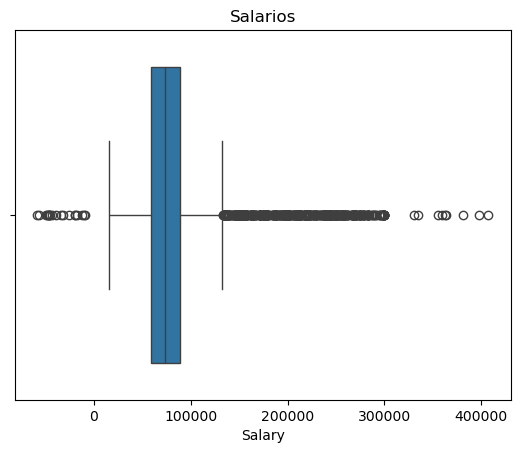

In [32]:
# Creamos un boxplot que explore los outliers
sns.boxplot(x="Salary",  data=df_hist)

plt.title("Salarios")

plt.show()

In [33]:
#COmprobamos los estadísticos de salario
df_hist["Salary"].describe().T.reset_index()

,index,Salary
0,count,12499.000000
1,mean,79245.609409
2,std,35008.297285
3,min,-58486.000000
4,25%,59246.500000
5,50%,73455.000000
6,75%,88517.500000
7,max,407228.000000


In [34]:
df_test_salary_2 = df_hist[df_hist["Salary"]<0]
df_test_salary_2.describe().T

,count,mean,min,25%,50%,75%,max,std
Loyalty Number,20.0,468736.9,115505.0,238155.0,433242.5,634692.75,959977.0,252923.534773
Salary,20.0,-35538.25,-58486.0,-46839.75,-41368.5,-19330.25,-9081.0,16009.447865
CLV,20.0,9919.029,2402.33,4787.58,6406.47,10334.1775,49423.8,10696.958387
Cancellation Year,2.0,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0,0.0
Cancellation Month,2.0,10.0,8.0,9.0,10.0,11.0,12.0,2.828427
Enrollment Date,20,2018-03-03 07:12:00,2018-02-01 00:00:00,2018-02-22 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-04-01 00:00:00,NaN


In [35]:
#¿Podría ser el valor más bajo de "Salary" un valor aceptable si lo pasamos a positivo? 
df_test_salary_2[df_test_salary_2["Salary"]== -9081.0]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Cancellation Year,Cancellation Month,Enrollment Date
11635,366599,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,-9081.0,Married,Star,6915.73,2018 Promotion,NaN,NaN,2018-04-01


In [36]:
#Hacemos tests con diferentes rangos para entender los nulos
df_test_salary = df_hist[df_hist["Salary"].between(0,50000)]
df_test_salary["Salary"].describe().T

count      908.000000
mean     45654.323789
std       6361.382728
min      15609.000000
25%      46548.000000
50%      47715.000000
75%      48824.000000
max      50000.000000
Name: Salary, dtype: float64

In [37]:
#Conluimos que sí pueden ser valores positivos y los convertimos
df_hist["Salary"] = df_hist["Salary"].abs()

In [38]:
#Comprobamos cómo queda el estadístico ahora
df_hist["Salary"].describe().T

count     12499.000000
mean      79359.340907
std       34749.691464
min        9081.000000
25%       59246.500000
50%       73455.000000
75%       88517.500000
max      407228.000000
Name: Salary, dtype: float64

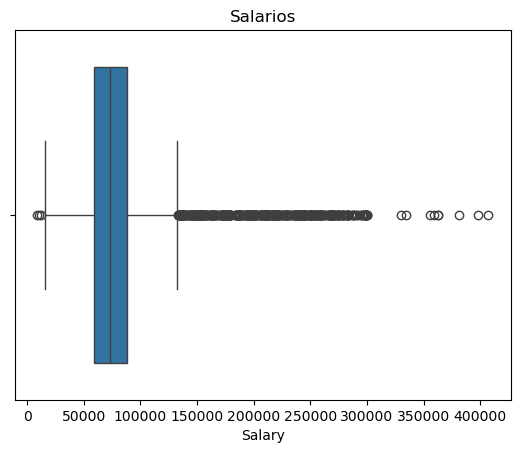

In [39]:
# Creamos otro boxplot, ahora nos indica muchos outliers a la derecha-
sns.boxplot(x="Salary",  data=df_hist)

plt.title("Salarios")

plt.show()

In [40]:
#Hacemos diferentes comprobaciones para entender qué correlación hay entre elsueldo y las otras columnas. La que aprece estar relacionada es Education
df_test_salary_3 = df_hist[df_hist["Salary"]>260000]
df_test_salary_3

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Cancellation Year,Cancellation Month,Enrollment Date
396,517758,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Doctor,269011.0,Divorced,Star,4570.67,Standard,NaN,NaN,2012-12-01
397,712062,Canada,Ontario,Kingston,M9K 2P4,Male,Doctor,269011.0,Divorced,Star,4570.67,Standard,NaN,NaN,2016-08-01
581,745336,Canada,Quebec,Montreal,H3T 8L4,Female,Doctor,288934.0,Married,Star,4791.08,Standard,2015.0,12.0,2015-04-01
646,103862,Canada,Ontario,Kingston,M9K 2P4,Female,Doctor,299560.0,Married,Star,4878.83,Standard,NaN,NaN,2013-07-01
647,121935,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Doctor,299560.0,Married,Star,4878.83,Standard,NaN,NaN,2015-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15269,167026,Canada,Quebec,Hull,J8Y 3Z5,Female,Doctor,260474.0,Divorced,Star,8807.49,Standard,NaN,NaN,2013-05-01
15270,545638,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Doctor,260474.0,Divorced,Star,8807.49,Standard,NaN,NaN,2018-11-01
15647,846055,Canada,British Columbia,Vancouver,V5R 1W3,Male,Doctor,274242.0,Married,Star,10418.31,Standard,NaN,NaN,2014-08-01
15750,788292,Canada,Ontario,Toronto,M1R 4K3,Female,Doctor,270797.0,Single,Star,11140.30,Standard,NaN,NaN,2013-09-01


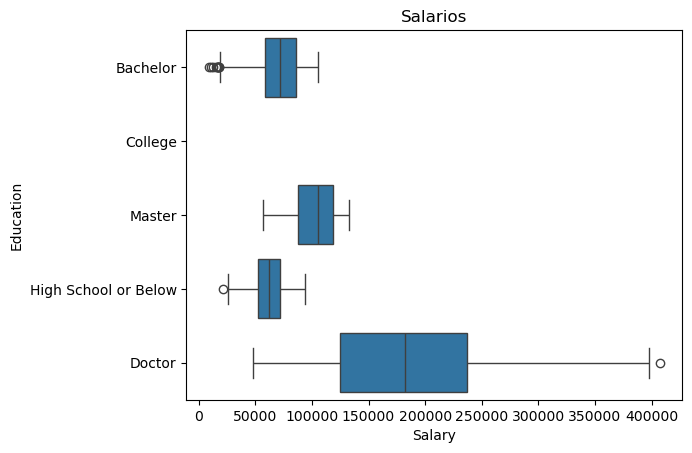

In [41]:
# Creamos un boxplot que nos muestre la relación de salarios y eduación. Vemos que College no tiene valores
sns.boxplot(x="Salary", y= "Education",  data=df_hist)

plt.title("Salarios")
plt.show()


In [42]:
#Empezamos a hacer comprobaciones con los niveles educativos
df_doctors = df_hist[df_hist["Education"]== "Doctor"]
df_doctors.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Cancellation Year,Cancellation Month,Enrollment Date
55,878633,Canada,Ontario,Trenton,K8V 4B2,Female,Doctor,163974.0,Married,Star,3936.79,Standard,NaN,NaN,2013-12-01
60,124678,Canada,Nova Scotia,Halifax,B3J 9S2,Male,Doctor,152955.0,Married,Star,3954.34,Standard,NaN,NaN,2013-06-01
61,186015,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Doctor,152955.0,Married,Star,3954.34,Standard,NaN,NaN,2015-09-01
62,461108,Canada,Quebec,Montreal,H2T 9K8,Male,Doctor,152955.0,Married,Star,3954.34,Standard,NaN,NaN,2018-10-01
63,589580,Canada,British Columbia,Whistler,V6T 1Y8,Male,Doctor,152955.0,Married,Star,3954.34,Standard,NaN,NaN,2015-08-01


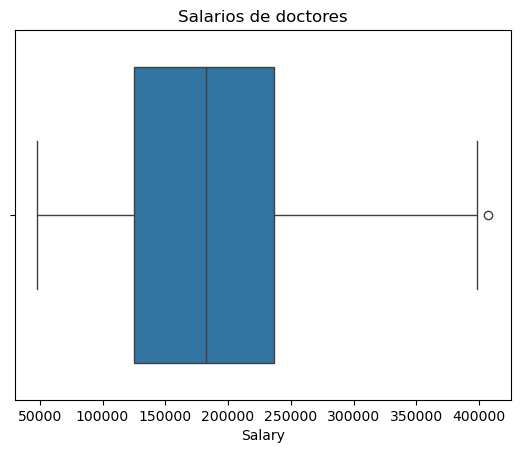

In [43]:
sns.boxplot(x="Salary",  data=df_doctors)
plt.title("Salarios de doctores")
plt.show()

In [44]:
#Comprobamos cuántos miembros de cada nivel educativo hay

df_edu = df_hist.groupby("Education")["Loyalty Number"].count().reset_index()
df_edu

,Education,Loyalty Number
0,Bachelor,10475
1,College,4238
2,Doctor,734
3,High School or Below,782
4,Master,508


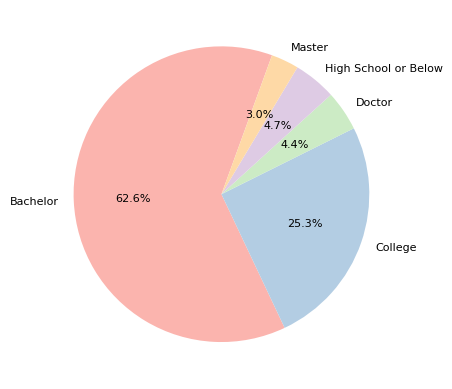

In [45]:
labels = df_edu["Education"]
colors = plt.cm.Pastel1(range(len(labels)))

plt.pie("Loyalty Number", labels= "Education",
        data = df_edu, 
        autopct=  "%1.1f%%", 
        colors = colors, 
        textprops={"fontsize": 8}, 
        startangle=70);

In [46]:
#Contabilizamos los nulos de College
df_salary_nuls = df_hist[df_hist["Salary"].isna()]
df_salary_nuls["Education"].value_counts()

Education
College    4238
Name: count, dtype: int64

In [47]:
#Confirmamos que College no tiene ningún valor
df_edu_salary = df_hist.groupby("Education")["Salary"].describe()
df_edu_salary 

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,10475.0,72577.254415,16667.023853,9081.0,58711.00,71960.0,85808.0,105563.0
College,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,734.0,178608.897820,70466.188750,48109.0,124768.00,182143.5,236612.0,407228.0
High School or Below,782.0,61199.161125,12105.354128,21853.0,52151.25,61915.0,71384.5,93875.0
Master,508.0,103757.848425,17527.938162,56414.0,88120.00,105487.0,118530.0,133080.0


In [48]:
#Creamos una copia del DataFrame ya que vamos hacer cambios en datos relevantes
df_hist_copy = df_hist.copy()

In [49]:
#Procedemos a completar los nulos con la mediana de Bachelor
# Paso 1: Calcular la mediana del salario de Bachelor
mediana_bachelor = df_hist_copy[df_hist_copy["Education"] == "Bachelor"]["Salary"].median()

# Paso 2: Imputar los valores NaN en la columna Salary, en las filas College con la mediana calculada
df_hist_copy.loc[(df_hist_copy["Education"] == "College") & (df_hist_copy["Salary"].isna()), "Salary"] = mediana_bachelor

In [50]:
#Reemplazamos los valores College por Bachelor
df_hist_copy["Education"] = df_hist_copy["Education"].replace("College", "Bachelor")
df_hist_copy.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Cancellation Year,Cancellation Month,Enrollment Date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,NaN,NaN,2016-02-01
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,Bachelor,71960.0,Divorced,Star,3839.61,Standard,NaN,NaN,2016-03-01
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,71960.0,Single,Star,3839.75,Standard,2018.0,1.0,2014-07-01
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,Bachelor,71960.0,Single,Star,3839.75,Standard,NaN,NaN,2013-02-01
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,NaN,NaN,2014-10-01


In [51]:
#Comprobamos que los valores estadísticos son consistentes con los que teníamos antes
print("Valores estadísticos de los salarios por Educación después de eliminar College")
df_hist_copy.groupby("Education")["Salary"].describe()

Valores estadísticos de los salarios por Educación después de eliminar College


,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,14713.0,72399.457623,14065.794328,9081.0,63654.00,71960.0,79766.0,105563.0
Doctor,734.0,178608.897820,70466.188750,48109.0,124768.00,182143.5,236612.0,407228.0
High School or Below,782.0,61199.161125,12105.354128,21853.0,52151.25,61915.0,71384.5,93875.0
Master,508.0,103757.848425,17527.938162,56414.0,88120.00,105487.0,118530.0,133080.0


In [52]:
print("Valores estadísticos de los salarios por Educación antes de eliminar College")

df_hist.groupby("Education")["Salary"].describe()

Valores estadísticos de los salarios por Educación antes de eliminar College


,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,10475.0,72577.254415,16667.023853,9081.0,58711.00,71960.0,85808.0,105563.0
College,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,734.0,178608.897820,70466.188750,48109.0,124768.00,182143.5,236612.0,407228.0
High School or Below,782.0,61199.161125,12105.354128,21853.0,52151.25,61915.0,71384.5,93875.0
Master,508.0,103757.848425,17527.938162,56414.0,88120.00,105487.0,118530.0,133080.0


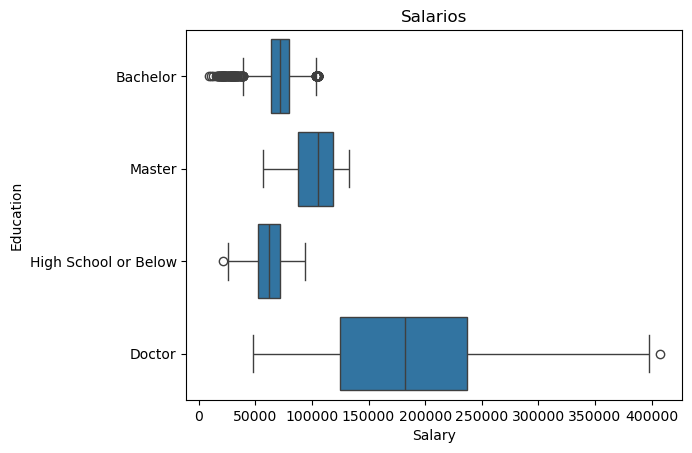

In [53]:
#Lo visualizamos con un Boxplot
sns.boxplot(x="Salary", y= "Education",  data=df_hist_copy)
plt.title("Salarios")
plt.show()

In [ ]:
#Y nos aseguramos cómo ha quedado la proporción 
df_edu2 = df_hist_copy.groupby("Education")["Loyalty Number"].count().reset_index()
df_edu2

,Education,Loyalty Number
0,Bachelor,14713
1,Doctor,734
2,High School or Below,782
3,Master,508


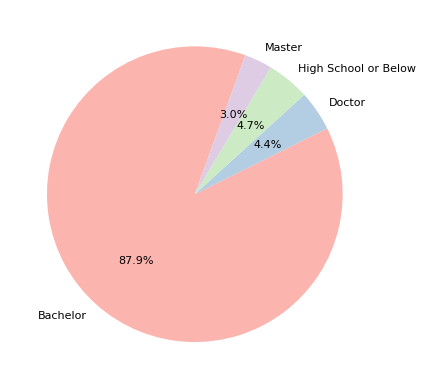

In [55]:
labels = df_edu2["Education"]
colors = plt.cm.Pastel1(range(len(labels)))

plt.pie("Loyalty Number", labels= "Education",
        data = df_edu2, 
        autopct=  "%1.1f%%", 
        colors = colors, 
        textprops={"fontsize": 8}, 
        startangle=70);

### Conclusiones de exploración y limpieza csv Customer Loyalty History

En una primera exploración del CSV Customer Loyalty History podemos observar que los tipos de datos son correctos. Para aligerar la carga de información, hemos unido las dos columnas de mes y año de cancelación y unión en una sola. 

En una primera exploración de nulos detectamos que hay nulos tanto en Salary como en las columnas de Cancellation. Los nulos en cancellation son normales ya que indican los usuarios que no han cancelado su cuenta. 

La columna de Salary parece tener varios problemas: por un lado tiene una gran cantidad de valores negativos, lo que no es posible ya que hablamos de salario, también tiene una cantidad considerable de nulos (alrededor de un 25%) y también muchos outlines. 

- **Empezamos con los valores negativos**. Después de hacer una exploración de los valores nos inclinamos por que es un error humano y se han introducido valores negativos cuando no lo son, así pues procedemos a convertir los negativos en positivos.
- A continuación hacemos un boxplot que **nos muestre los outliers** una vez todos los valores son positivos. Hay muchos outliers que indican una gran desviación de la media, pero al acotar ese filtro únicamente a los usuarios con eduación "Doctor" nos sale un boxplot con valores normales, por lo que podemos concluir, que dentro de los valores atípicos, son correctos. 
- **Valorando los datos nulos** nos damos cuenta que todos tienen correlación con el nivel de educación "College". College es un término que no indica un nivel educativo. Se podría asumir que hubo un error y etiquetaron a graduados universitarios (Bachelor), como College (Universidad). Así pues procedemos a corregir esto en la columna Education y a asignar la  mediana de Bachellor a los NAN de College. Comprobamos que la media cambia ligeramente, pero que la mediana se mantiene y que los datos son consistentes. 



In [56]:
#Unión de los dos dataframes a través de la columna "Loyalty Number"
df_union = pd.merge(df_hist_copy, df_act_no_dup, on= "Loyalty Number", how="right") 
df_union

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Cancellation Year,Cancellation Month,Enrollment Date,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100504,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,75638.0,Divorced,Nova,8807.61,Standard,2018.0,3.0,2017-07-01,2018,12,0,0,0,0,0.0,0,0
1,101709,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,66733.0,Single,Aurora,8396.61,Standard,2018.0,8.0,2015-09-01,2018,12,0,0,0,0,0.0,0,0
2,101876,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,71960.0,Single,Aurora,4949.53,Standard,2018.0,6.0,2017-10-01,2018,12,0,0,0,0,0.0,0,0
3,105251,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,80885.0,Married,Star,5074.25,Standard,2017.0,8.0,2014-10-01,2018,12,0,0,0,0,0.0,0,0
4,106509,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,54529.0,Married,Nova,16727.77,Standard,2018.0,10.0,2017-04-01,2018,12,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,999902,Canada,Ontario,Toronto,M1R 4K3,Male,Bachelor,71960.0,Married,Aurora,7290.07,Standard,NaN,NaN,2014-05-01,2018,12,0,0,0,0,0.0,0,0
16733,999911,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,NaN,NaN,2012-08-01,2018,12,0,0,0,0,0.0,0,0
16734,999940,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,NaN,NaN,2017-07-01,2018,12,3,0,3,1233,123.0,0,0
16735,999982,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,71960.0,Married,Star,2631.56,Standard,NaN,NaN,2018-07-01,2018,12,0,0,0,0,0.0,0,0


# Fase 2: Visualización


 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [58]:

df_flights = df_union.groupby("Month")["Flights Booked"].sum().reset_index()

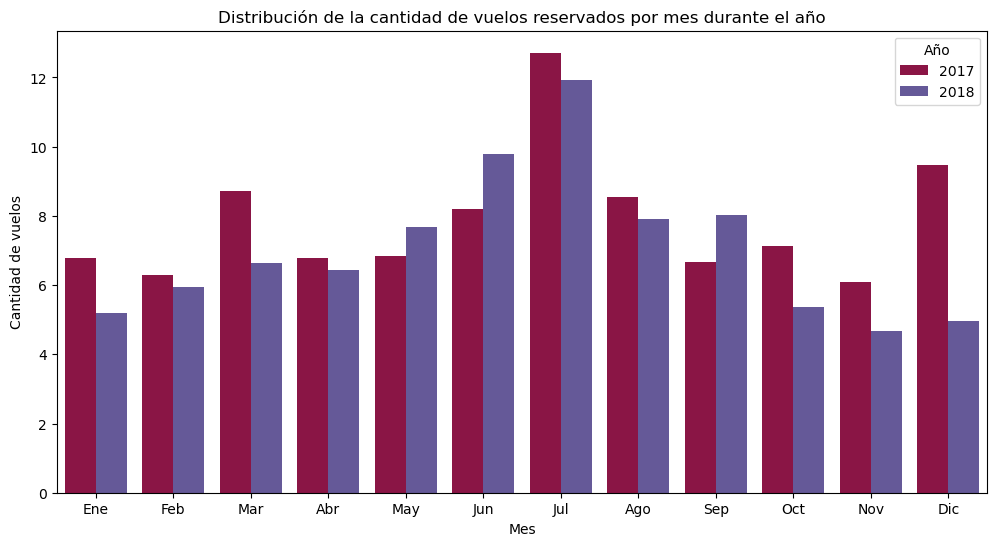

In [85]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Month", 
            y="Flights Booked", 
            hue="Year", 
            data=df_union, 
            palette="Spectral", 
            errorbar=None)

plt.title("Distribución de la cantidad de vuelos reservados por mes durante el año")
plt.xlabel("Mes")
plt.ylabel("Cantidad de vuelos")
plt.xticks(range(0, 12), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.legend(title="Año")
plt.show()

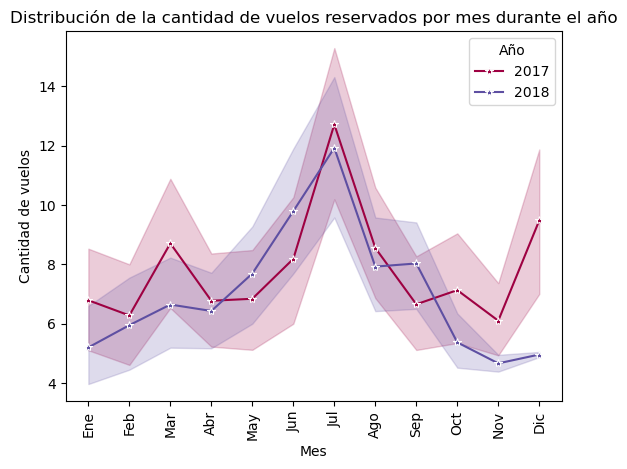

In [86]:
sns.lineplot(y= "Flights Booked",
            x = "Month", 
            data = df_union, 
            marker="*",
            palette= "Spectral",
            hue = "Year")
plt.title("Distribución de la cantidad de vuelos reservados por mes durante el año")
plt.xlabel("Mes")
plt.ylabel("Cantidad de vuelos")
plt.legend(title="Año")
plt.xticks(ticks=range(1,13),labels=["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], rotation=90);
plt.show()

En ambos años coincide que el pico más alto de reservas cae en la temporada estival, los meses de mayo a agosto. El año 2018 hubo una ligera disminución de vuelos reservados que se nota especialmente en las otras fechas festivas: Semana Santa y Navidad.

 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

''

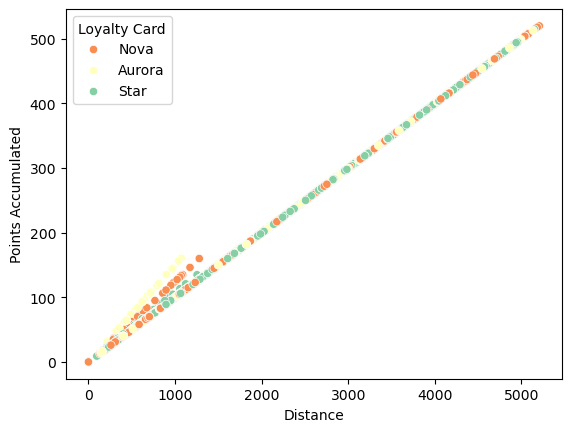

In [87]:
sns.scatterplot(x = "Distance", 
                y = "Points Accumulated",
                hue= "Loyalty Card", 
                data = df_union, palette = "Spectral")
;

Sí, hay una relación, a más distancia recorrida más puntos. Además se percibe una tendencia entre los usuarios de las tarjetas Nova y Aurora, los cuales sacan mayor rentabilidad de puntos por sus tarjetas

3. ¿Cuál es la distribución de los clientes por provincia o estado?


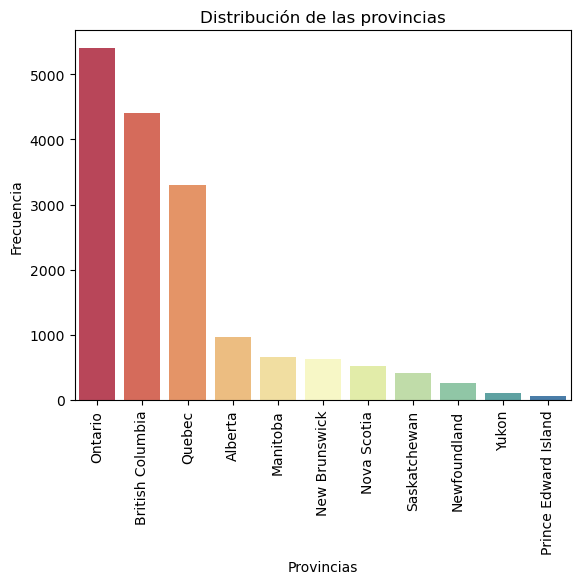

In [88]:
province_order = df_union["Province"].value_counts().index
sns.countplot(x="Province", 
              data=df_union, 
              palette="Spectral", 
              order=province_order)
plt.title("Distribución de las provincias")
plt.xlabel("Provincias")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90);


La mayoría de los usuarios del plan de puntos viven en provincias con grandes nucleos urbanos de Canadá: Ontario, British Columbia y Quebec.

4 . ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

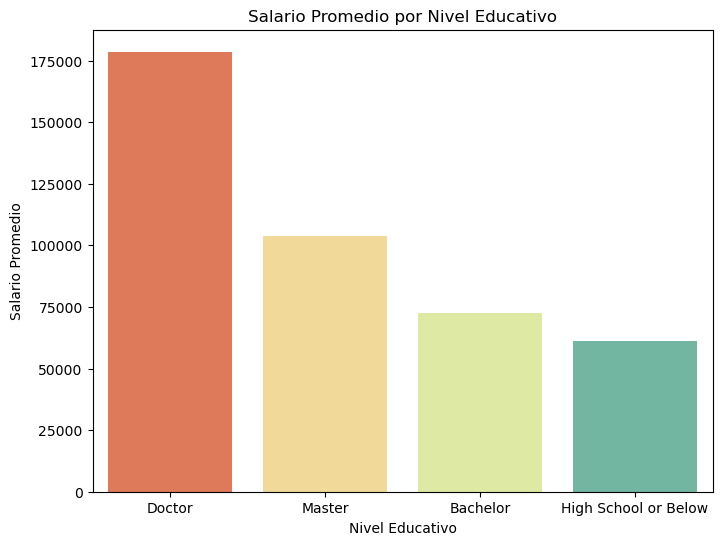

In [89]:
df_avg_salary = df_union.groupby("Education")["Salary"].mean().reset_index().sort_values(by="Salary", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="Education", y="Salary", data=df_avg_salary, palette="Spectral")

plt.title("Salario Promedio por Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Salario Promedio");

Aunque el valor "Doctor" dentro de la columna "Education" solo está presente en un 4,4%, el sueldo medio de los doctores sobrepasapor mucho a los de los siguientes rangos educativos

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


In [ ]:
df_fidelity = df_union.groupby("Loyalty Card")["Loyalty Number"].count().reset_index()

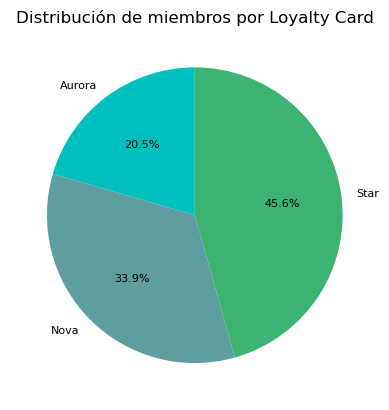

In [ ]:
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("Loyalty Number", labels= "Loyalty Card",
        data = df_fidelity, 
        autopct=  "%1.1f%%", 
        colors = colores, 
        textprops={"fontsize": 8}, 
        startangle=90);
plt.title("Distribución de miembros por Loyalty Card");

La tarjeta Star es la más popular entre los clientes con un 45%, le sigue la Nova con un 33,9% y en último lugar la tarjeta Aurora con un 20,5%

6. ¿Cómo se distribuyen los clientes según su estado civil y género?


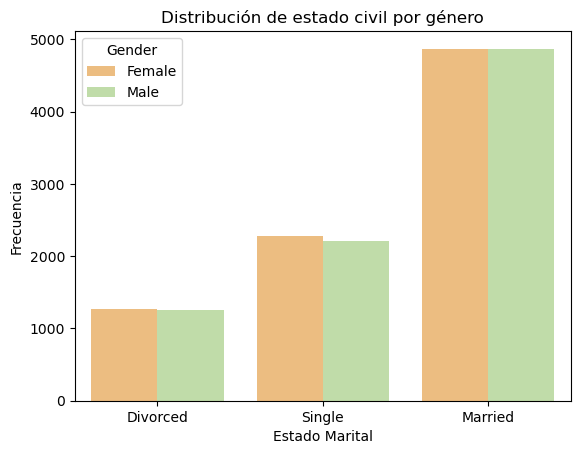

In [90]:
sns.countplot(x="Marital Status", data=df_union, hue="Gender", palette="Spectral")

# Añadir título y etiquetas
plt.title("Distribución de estado civil por género")
plt.xlabel("Estado Marital")
plt.ylabel("Frecuencia")

plt.show()

Según muestran los datos hay bastante paridad entre hombres y mujeres en los tres estatus maritales que se presentan, siendo mucho más presentes las personas casadas de cualquier género, seguidas por los solteros y en última instancia divorciados.

### BONUS 
## Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo


 1 . Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
 'Flights Booked' y 'Education'.

In [ ]:
df_edu_flights = df_union[["Flights Booked", "Education"]]

2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
 básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada
 grupo.

In [ ]:
df_edu_flights["Education"].unique()

array(['Bachelor', 'High School or Below', 'Master', 'Doctor'],
      dtype=object)

In [ ]:
edu = ["Bachelor", "Master", "Doctor", 'High School or Below']

for c in edu:
    print(f"Nivel educativo: {c}")
    display(df_edu_flights[df_edu_flights["Education"]== c].describe().T)

Nivel educativo: Bachelor


,count,mean,std,min,25%,50%,75%,max
Flights Booked,14713.0,5.027799,5.652344,0.0,0.0,3.0,10.0,21.0


Nivel educativo: Master


,count,mean,std,min,25%,50%,75%,max
Flights Booked,508.0,5.395669,5.596468,0.0,0.0,4.0,10.0,19.0


Nivel educativo: Doctor


,count,mean,std,min,25%,50%,75%,max
Flights Booked,734.0,4.824251,5.65424,0.0,0.0,2.0,10.0,20.0


Nivel educativo: High School or Below


,count,mean,std,min,25%,50%,75%,max
Flights Booked,782.0,5.176471,5.786165,0.0,0.0,3.0,11.0,20.0
